In [156]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings
from scipy.stats import ttest_ind

In [253]:
df = pd.read_csv('fifa_cleaned.csv', index_col=0)
df

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),work_rate,body_type,release_clause_euro,club_team,club_rating,club_position,club_jersey_number,club_join_date,contract_end_year,national_team,national_rating,national_team_position,national_jersey_number,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,tags,traits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,5,4,4,Medium/ Low,Messi,226500000.0,FC Barcelona,86.0,RW,10.0,2004-07-01,2021,Argentina,82.0,RF,10.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,"#Dribbler,#Distance Shooter,#Crosser,#FK Speci...","Finesse Shot,Long Shot Taker (CPU AI Only),Spe...",89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,91+2,85+2,85+2,85+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,3,5,4,High/ Medium,Lean,133800000.0,Tottenham Hotspur,83.0,LCM,23.0,2013-08-30,2020,Denmark,78.0,CAM,10.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6,"#Playmaker ,#Crosser,#FK Specialist,#Complete...","Flair,Long Shot Taker (CPU AI Only),Playmaker ...",79+3,79+3,79+3,85+3,84+3,84+3,84+3,85+3,86+3,86+3,86+3,86+3,85+3,85+3,85+3,86+3,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,4,4,5,High/ Medium,Normal,144200000.0,Manchester United,82.0,LCM,6.0,2016-08-09,2021,France,84.0,RDM,6.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3,"#Dribbler,#Playmaker ,#Strength,#Complete Mid...","Flair,Long Passer (CPU AI Only),Long Shot Take...",81+3,81+3,81+3,82+3,83+3,83+3,83+3,82+3,84+3,84+3,84+3,83+3,84+3,84+3,84+3,83+3,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,Right,3,4,4,High/ Medium,Normal,105400000.0,Napoli,82.0,LS,24.0,2010-07-01,2022,Italy,83.0,LW,10.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,8,4,14,9,10,"#Speedster,#Dribbler,#Crosser,#Acrobat","Finesse Shot,Long Shot Taker (CPU AI Only),Spe...",78+3,78+3,78+3,86+3,85+3,85+3,85+3,86+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,Right,3,3,2,High/ High,Normal,106500000.0,Napoli,82.0,LCB,26.0,2014-07-01,2021,NaN,NaN,NaN,NaN,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,7,11,7,13,5,"#Tackling ,#Tactician ,#Strength,#Complete Def...",Power Header,53+3,53+3,53+3,53+3,54+3,54+3,54+3,53+3,55+3,55+3,55+3,57+3,61+3,61+3,61+3,57+3,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [24]:
pd.set_option('display.max_columns', None)
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),work_rate,body_type,release_clause_euro,club_team,club_rating,club_position,club_jersey_number,club_join_date,contract_end_year,national_team,national_rating,national_team_position,national_jersey_number,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,tags,traits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,5,4,4,Medium/ Low,Messi,226500000.0,FC Barcelona,86.0,RW,10.0,2004-07-01,2021,Argentina,82.0,RF,10.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,"#Dribbler,#Distance Shooter,#Crosser,#FK Speci...","Finesse Shot,Long Shot Taker (CPU AI Only),Spe...",89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,91+2,85+2,85+2,85+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,3,5,4,High/ Medium,Lean,133800000.0,Tottenham Hotspur,83.0,LCM,23.0,2013-08-30,2020,Denmark,78.0,CAM,10.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6,"#Playmaker ,#Crosser,#FK Specialist,#Complete...","Flair,Long Shot Taker (CPU AI Only),Playmaker ...",79+3,79+3,79+3,85+3,84+3,84+3,84+3,85+3,86+3,86+3,86+3,86+3,85+3,85+3,85+3,86+3,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,4,4,5,High/ Medium,Normal,144200000.0,Manchester United,82.0,LCM,6.0,2016-08-09,2021,France,84.0,RDM,6.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3,"#Dribbler,#Playmaker ,#Strength,#Complete Mid...","Flair,Long Passer (CPU AI Only),Long Shot Take...",81+3,81+3,81+3,82+3,83+3,83+3,83+3,82+3,84+3,84+3,84+3,83+3,84+3,84+3,84+3,83+3,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,Right,3,4,4,High/ Medium,Normal,105400000.0,Napoli,82.0,LS,24.0,2010-07-01,2022,Italy,83.0,LW,10.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,8,4,14,9,10,"#Speedster,#Dribbler,#Crosser,#Acrobat","Finesse Shot,Long Shot Taker (CPU AI Only),Spe...",78+3,78+3,78+3,86+3,85+3,85+3,85+3,86+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,Right,3,3,2,High/ High,Normal,106500000.0,Napoli,82.0,LCB,26.0,2014-07-01,2021,NaN,NaN,NaN,NaN,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,7,11,7,13,5,"#Tackling ,#Tactician ,#Strength,#Complete Def...",Power Header,53+3,53+3,53+3,53+3,54+3,54+3,54+3,53+3,55+3,55+3,55+3,57+3,61+3,61+3,61+3,57+3,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3


In [25]:
df.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'work_rate', 'body_type',
       'release_clause_euro', 'club_team', 'club_rating', 'club_position',
       'club_jersey_number', 'club_join_date', 'contract_end_year',
       'national_team', 'national_rating', 'national_team_position',
       'national_jersey_number', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'GK_divi

In [26]:
df.shape

(17954, 91)

In [27]:
df.isnull().sum()

name             0
full_name        0
birth_date       0
age              0
height_cm        0
              ... 
LB            2065
LCB           2065
CB            2065
RCB           2065
RB            2065
Length: 91, dtype: int64

In [28]:
fifa = df.drop(['full_name', 'birth_date', 'positions', 'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)', 'work_rate', 'body_type', 'club_jersey_number', 'club_join_date', 'contract_end_year', 'national_jersey_number', 'tags', 'traits', 'LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB'], axis=1)

In [29]:
fifa.shape

(17954, 51)

In [30]:
fifa

,name,age,height_cm,weight_kgs,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,release_clause_euro,club_team,club_rating,club_position,national_team,national_rating,national_team_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,170.18,72.1,Argentina,94,94,110500000.0,565000.0,Left,226500000.0,FC Barcelona,86.0,RW,Argentina,82.0,RF,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8
190460,C. Eriksen,27,154.94,76.2,Denmark,88,89,69500000.0,205000.0,Right,133800000.0,Tottenham Hotspur,83.0,LCM,Denmark,78.0,CAM,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6
195864,P. Pogba,25,190.50,83.9,France,88,91,73000000.0,255000.0,Right,144200000.0,Manchester United,82.0,LCM,France,84.0,RDM,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3
198219,L. Insigne,27,162.56,59.0,Italy,88,88,62000000.0,165000.0,Right,105400000.0,Napoli,82.0,LS,Italy,83.0,LW,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,8,4,14,9,10
201024,K. Koulibaly,27,187.96,88.9,Senegal,88,91,60000000.0,135000.0,Right,106500000.0,Napoli,82.0,LCB,NaN,NaN,NaN,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,7,11,7,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204322,R. McKenzie,25,175.26,74.8,Scotland,67,70,975000.0,3000.0,Right,1800000.0,Kilmarnock,67.0,SUB,NaN,NaN,NaN,57,61,60,66,37,64,53,47,61,66,83,86,93,63,82,51,77,75,64,54,69,41,60,64,63,56,40,20,18,15,11,15,12,7
239762,M. Sipľak,23,182.88,79.8,Slovakia,59,67,190000.0,1000.0,Left,295000.0,Cracovia,65.0,LB,NaN,NaN,NaN,50,19,53,55,31,52,26,28,43,53,70,64,54,50,53,27,74,66,70,22,62,55,42,39,32,52,53,64,60,15,7,7,15,8
235155,J. Bekkema,22,185.42,89.8,Netherlands,59,67,170000.0,1000.0,Right,289000.0,SC Heerenveen,69.0,RES,NaN,NaN,NaN,11,9,13,26,9,12,13,12,24,18,27,22,29,48,38,17,43,25,63,9,27,10,5,25,16,47,9,12,13,63,57,50,58,63


In [31]:
fifa.isnull().sum()

name                          0
age                           0
height_cm                     0
weight_kgs                    0
nationality                   0
overall_rating                0
potential                     0
value_euro                  255
wage_euro                   246
preferred_foot                0
release_clause_euro        1837
club_team                    14
club_rating                  14
club_position                14
national_team             17097
national_rating           17097
national_team_position    17097
crossing                      0
finishing                     0
heading_accuracy              0
short_passing                 0
volleys                       0
dribbling                     0
curve                         0
freekick_accuracy             0
long_passing                  0
ball_control                  0
acceleration                  0
sprint_speed                  0
agility                       0
reactions                     0
balance 

In [36]:
fifa['value_euro'].dropna(inplace=True)

In [37]:
fifa['wage_euro'].dropna(inplace=True)

In [231]:
fifa.shape

(17699, 51)

In [45]:
fifa.dropna(subset=['value_euro','wage_euro'], inplace=True)

In [53]:
#fifa.isnull().sum()

In [51]:
fifa['release_clause_euro'].fillna(0, inplace=True)

In [70]:
#fifa.isnull().sum()

In [64]:
fifa.shape

(17699, 51)

In [65]:
fifa['national_team'].fillna(0, inplace=True)

In [67]:
fifa['national_rating'].fillna(0, inplace=True)

In [68]:
fifa['national_team_position'].fillna(0, inplace=True)

In [69]:
fifa.isnull().sum()

name                      0
age                       0
height_cm                 0
weight_kgs                0
nationality               0
overall_rating            0
potential                 0
value_euro                0
wage_euro                 0
preferred_foot            0
release_clause_euro       0
club_team                 0
club_rating               0
club_position             0
national_team             0
national_rating           0
national_team_position    0
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                   0
dribbling                 0
curve                     0
freekick_accuracy         0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                   0
reactions                 0
balance                   0
shot_power                0
jumping                   0
stamina                   0
strength            

In [73]:
fifa.dtypes

name                       object
age                         int64
height_cm                 float64
weight_kgs                float64
nationality                object
overall_rating              int64
potential                   int64
value_euro                float64
wage_euro                 float64
preferred_foot             object
release_clause_euro       float64
club_team                  object
club_rating               float64
club_position              object
national_team              object
national_rating           float64
national_team_position     object
crossing                    int64
finishing                   int64
heading_accuracy            int64
short_passing               int64
volleys                     int64
dribbling                   int64
curve                       int64
freekick_accuracy           int64
long_passing                int64
ball_control                int64
acceleration                int64
sprint_speed                int64
agility       

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


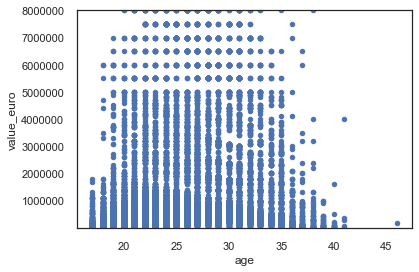

In [55]:
var = 'age'
data = pd.concat([df['value_euro'], fifa[var]], axis=1)
data.plot.scatter(x=var, y='value_euro', ylim=(3,8000000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


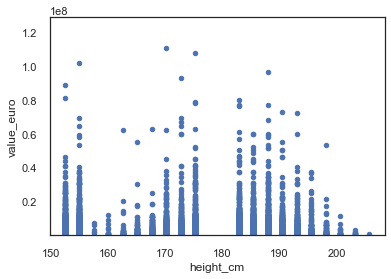

In [277]:
var = 'height_cm'
data = pd.concat([df['value_euro'], fifa[var]], axis=1)
data.plot.scatter(x=var, y='value_euro', ylim=(3,129000000));

In [279]:
fifa['height_cm'].describe()

count   17699.000000
mean      174.930355
std        14.036180
min       152.400000
25%       154.940000
50%       175.260000
75%       185.420000
max       205.740000
Name: height_cm, dtype: float64

In [339]:
# corr = fifa.corr()
# corr

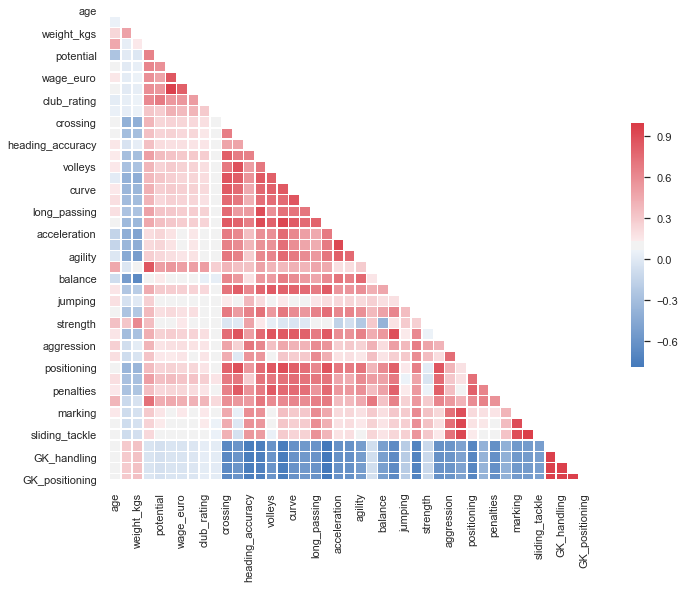

In [79]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corr, dropDuplicates = True)

In [112]:
cleanup_pos  = { 'club_position': {'LS':1, 'ST':2, 'RS':3,'LW':4, 'LF':5, 'CF':6, 'RF':7, 'RW':8, 'LAM':9, 'CAM':10, 'RAM':11, 'LM':12, 'LCM':13, 'CM':14,
       'RCM':15, 'RM':16, 'LWB':17, 'LDM':18, 'CDM':19, 'RDM':20, 'RWB':21, 'LB':22, 'LCB':23, 'CB':24,
       'RCB':25, 'RB':26,  'SUB':27, 'GK':28, 'RES':29}}

In [113]:
fifa.replace(cleanup_pos, inplace=True)
fifa.head()

,name,age,height_cm,weight_kgs,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,release_clause_euro,club_team,club_rating,club_position,national_team,national_rating,national_team_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,170.18,72.1,Argentina,94,94,110500000.0,565000.0,Left,226500000.0,FC Barcelona,86.0,8,Argentina,82.0,7,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8
190460,C. Eriksen,27,154.94,76.2,Denmark,88,89,69500000.0,205000.0,Right,133800000.0,Tottenham Hotspur,83.0,13,Denmark,78.0,10,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6
195864,P. Pogba,25,190.50,83.9,France,88,91,73000000.0,255000.0,Right,144200000.0,Manchester United,82.0,13,France,84.0,20,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3
198219,L. Insigne,27,162.56,59.0,Italy,88,88,62000000.0,165000.0,Right,105400000.0,Napoli,82.0,1,Italy,83.0,4,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,8,4,14,9,10
201024,K. Koulibaly,27,187.96,88.9,Senegal,88,91,60000000.0,135000.0,Right,106500000.0,Napoli,82.0,23,0,0.0,0,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,7,11,7,13,5


In [114]:
fifa['club_position'].astype(int)

id
158023     8
190460    13
195864    13
198219     1
201024    23
          ..
204322    27
239762    22
235155    29
244883    29
247187    29
Name: club_position, Length: 17699, dtype: int64

In [128]:
cleanup_nationalposition  = { 'national_team_position': {'LS':1, 'ST':2, 'RS':3,'LW':4, 'LF':5, 'CF':6, 'RF':7, 'RW':8, 'LAM':9, 'CAM':10, 'RAM':11, 'LM':12, 'LCM':13, 'CM':14,
       'RCM':15, 'RM':16, 'LWB':17, 'LDM':18, 'CDM':19, 'RDM':20, 'RWB':21, 'LB':22, 'LCB':23, 'CB':24,
       'RCB':25, 'RB':26 , 'SUB':27, 'GK':28, 'RES':29}}

In [129]:
fifa['national_team_position'].astype(int)

id
158023     7
190460    10
195864    20
198219     4
201024     0
          ..
204322     0
239762     0
235155     0
244883     0
247187     0
Name: national_team_position, Length: 17699, dtype: int64

In [140]:
fifa.dtypes

name                       object
age                         int64
height_cm                 float64
weight_kgs                float64
nationality                object
overall_rating              int64
potential                   int64
value_euro                float64
wage_euro                 float64
preferred_foot              int64
release_clause_euro       float64
club_team                  object
club_rating               float64
club_position               int64
national_team              object
national_rating           float64
national_team_position      int64
crossing                    int64
finishing                   int64
heading_accuracy            int64
short_passing               int64
volleys                     int64
dribbling                   int64
curve                       int64
freekick_accuracy           int64
long_passing                int64
ball_control                int64
acceleration                int64
sprint_speed                int64
agility       

In [135]:
#fifa.replace(cleanup_nationalposition, inplace=True)
#fifa.head()

In [137]:
cleanup_preferred_foot  = { 'preferred_foot': { 'Left':1 , 'Right':2}}



In [138]:
fifa.replace(cleanup_preferred_foot, inplace=True)
fifa.head()

,name,age,height_cm,weight_kgs,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,release_clause_euro,club_team,club_rating,club_position,national_team,national_rating,national_team_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,170.18,72.1,Argentina,94,94,110500000.0,565000.0,1,226500000.0,FC Barcelona,86.0,8,Argentina,82.0,7,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8
190460,C. Eriksen,27,154.94,76.2,Denmark,88,89,69500000.0,205000.0,2,133800000.0,Tottenham Hotspur,83.0,13,Denmark,78.0,10,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6
195864,P. Pogba,25,190.50,83.9,France,88,91,73000000.0,255000.0,2,144200000.0,Manchester United,82.0,13,France,84.0,20,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3
198219,L. Insigne,27,162.56,59.0,Italy,88,88,62000000.0,165000.0,2,105400000.0,Napoli,82.0,1,Italy,83.0,4,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,8,4,14,9,10
201024,K. Koulibaly,27,187.96,88.9,Senegal,88,91,60000000.0,135000.0,2,106500000.0,Napoli,82.0,23,0,0.0,0,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,7,11,7,13,5


In [139]:
corr = fifa.corr()
corr

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,preferred_foot,release_clause_euro,club_rating,club_position,national_rating,national_team_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
age,1.000000,0.059089,0.232830,0.464441,-0.258674,0.082360,0.153378,0.002908,0.073259,0.020309,-0.168440,0.052114,0.049765,0.136166,0.077491,0.155216,0.140952,0.150020,0.019795,0.150614,0.198455,0.188358,0.095119,-0.147862,-0.140077,-0.009579,0.465796,-0.081761,0.161288,0.188371,0.109492,0.343408,0.166921,0.268144,0.200539,0.089281,0.197345,0.149590,0.397070,0.149061,0.120518,0.104790,0.098695,0.103211,0.102314,0.113844,0.100662
height_cm,0.059089,1.000000,0.495127,0.038585,0.010119,0.011144,0.021367,0.049315,0.010558,0.034251,0.083686,0.027535,0.040228,-0.389155,-0.296758,-0.041444,-0.289689,-0.279917,-0.381995,-0.345969,-0.315931,-0.262872,-0.328255,-0.407170,-0.350886,-0.438439,-0.019489,-0.532015,-0.239276,-0.053218,-0.254548,0.319884,-0.305572,-0.074177,-0.078444,-0.353444,-0.286725,-0.271533,-0.111448,-0.089061,-0.081231,-0.085954,0.294838,0.295546,0.291176,0.295750,0.296517
weight_kgs,0.232830,0.495127,1.000000,0.150597,-0.014702,0.044519,0.062204,0.072129,0.036579,0.062034,0.041343,0.065198,0.072548,-0.394216,-0.294177,0.029888,-0.290895,-0.263455,-0.413276,-0.347321,-0.305106,-0.260267,-0.338657,-0.481634,-0.412963,-0.533122,0.082660,-0.662917,-0.196979,0.005336,-0.230632,0.611555,-0.278025,0.021705,-0.034373,-0.354636,-0.281524,-0.250738,-0.044187,-0.056891,-0.055409,-0.065295,0.341212,0.340878,0.338969,0.343132,0.342420
overall_rating,0.464441,0.038585,0.150597,1.000000,0.646276,0.630928,0.577478,-0.046855,0.583616,0.610369,-0.302318,0.320646,0.278188,0.399181,0.343103,0.348855,0.508115,0.397413,0.379939,0.424808,0.401812,0.490830,0.465967,0.205280,0.219187,0.276214,0.857014,0.114506,0.446920,0.271670,0.370494,0.362575,0.430491,0.398530,0.323358,0.363150,0.508294,0.351300,0.731415,0.293862,0.255525,0.226158,-0.030558,-0.029916,-0.032971,-0.020909,-0.027732
potential,-0.258674,0.010119,-0.014702,0.646276,1.000000,0.576341,0.484318,-0.040413,0.540419,0.681541,-0.138507,0.280679,0.240511,0.243489,0.246704,0.203303,0.367346,0.254930,0.314748,0.276799,0.229518,0.321517,0.350149,0.238832,0.240918,0.224791,0.505206,0.142741,0.288969,0.104683,0.197739,0.076919,0.264632,0.168882,0.151394,0.246375,0.346345,0.226165,0.434262,0.162621,0.143512,0.129212,-0.058670,-0.059499,-0.062954,-0.056675,-0.057662
value_euro,0.082360,0.011144,0.044519,0.630928,0.576341,1.000000,0.856466,-0.017133,0.964285,0.540529,-0.214419,0.423571,0.310694,0.251093,0.261003,0.188190,0.329467,0.291412,0.273006,0.289540,0.268270,0.306941,0.309655,0.174608,0.176703,0.199008,0.547615,0.118869,0.284693,0.128507,0.216471,0.138230,0.284085,0.189101,0.142375,0.262596,0.363445,0.243599,0.456538,0.138085,0.110455,0.090450,-0.028961,-0.029126,-0.030189,-0.027929,-0.028677
wage_euro,0.153378,0.021367,0.062204,0.577478,0.484318,0.856466,1.000000,-0.016746,0.814723,0.548238,-0.141761,0.371751,0.276502,0.238852,0.224925,0.193407,0.302847,0.264484,0.241829,0.266930,0.244549,0.285891,0.282590,0.130694,0.135345,0.163173,0.505164,0.095128,0.265418,0.134527,0.185266,0.147524,0.257071,0.200634,0.160066,0.233430,0.325503,0.230682,0.428759,0.150899,0.128447,0.113910,-0.029802,-0.029176,-0.031331,-0.029042,-0.029959
preferred_foot,0.002908,0.049315,0.072129,-0.046855,-0.040413,-0.017133,-0.016746,1.000000,-0.016724,-0.040015,0.009114,-0.002249,-0.000599,-0.206686,-0.042797,-0.044343,-0.104112,-0.053213,-0.133248,-0.160445,-0.150251,-0.108441,-0.118074,-0.117603,-0.115773,-0.107701,-0.027098,-0.095377,-0.077007,0.022239,-0.093406,0.040257

In [144]:
fifa['age'].min()

17

In [150]:
all_features = ['age', 'height_cm', 'weight_kgs', 'overall_rating', 'potential', 'wage_euro', 'preferred_foot', 'release_clause_euro', 'club_rating', 'club_position', 'national_rating',
       'national_team_position', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'GK_diving', 'GK_handling', 'GK_kicking',
       'GK_positioning', 'GK_reflexes']

In [151]:
#break the colums in to groups to plot 4 on a row at a time
n = 4
row_groups= [all_features[i:i+n] for i in range(0, len(all_features), n)]

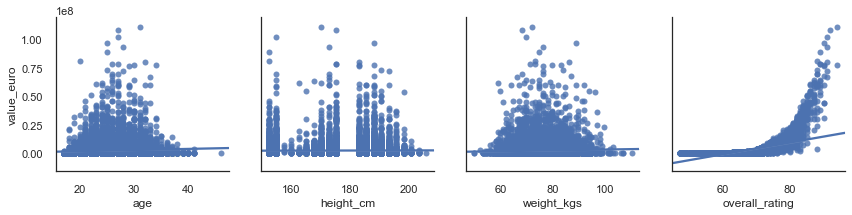

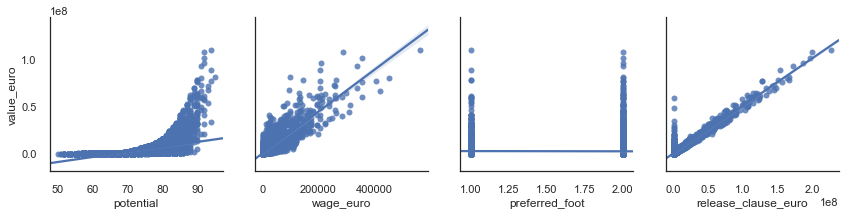

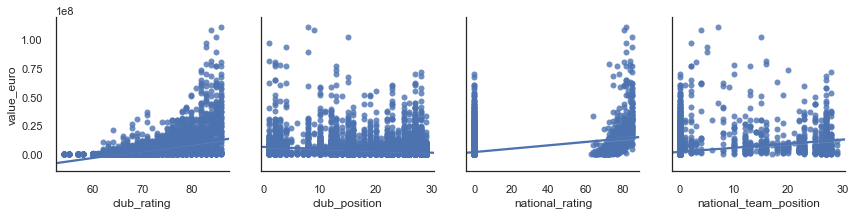

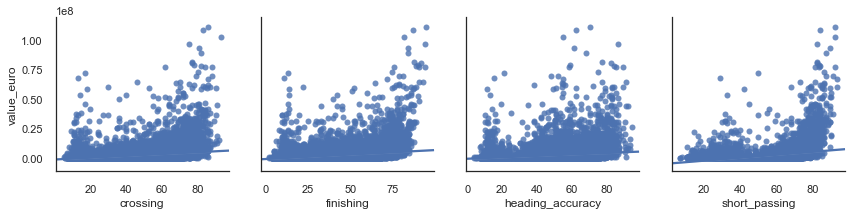

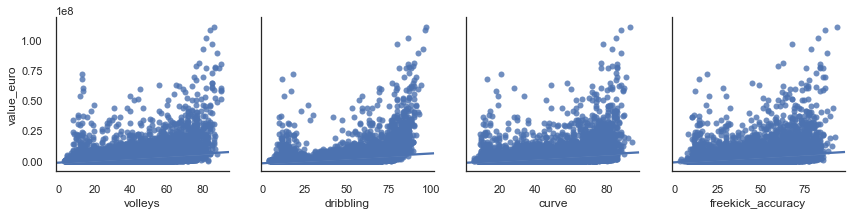

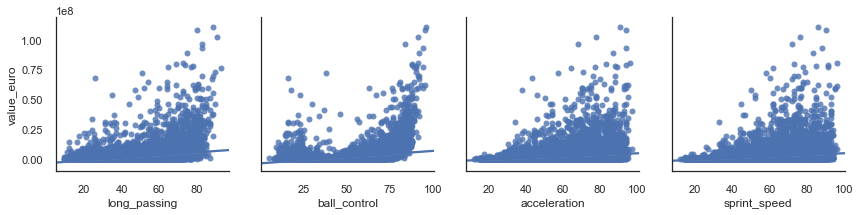

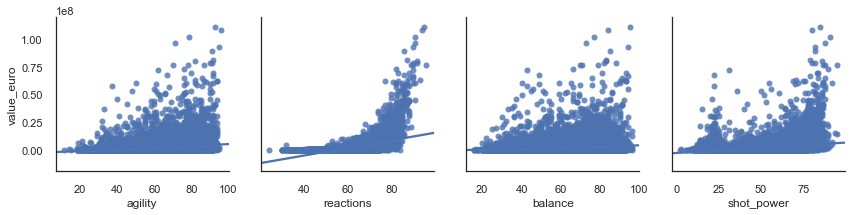

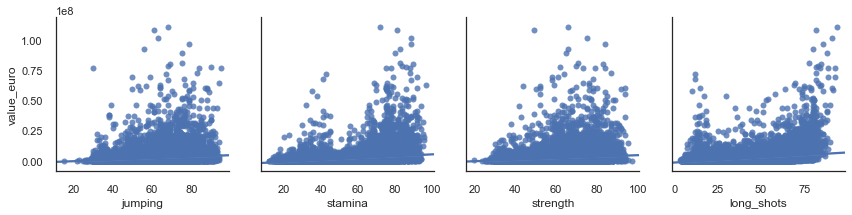

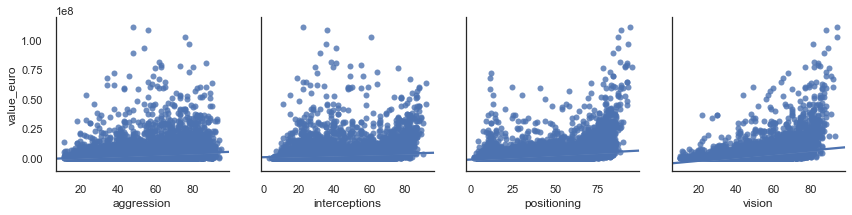

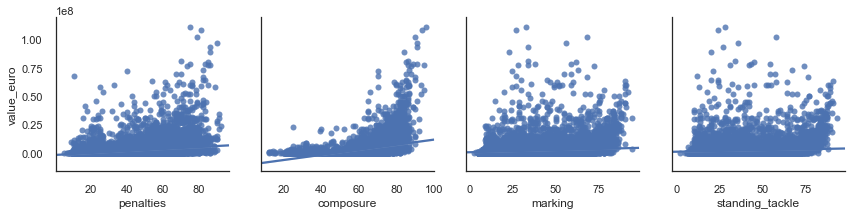

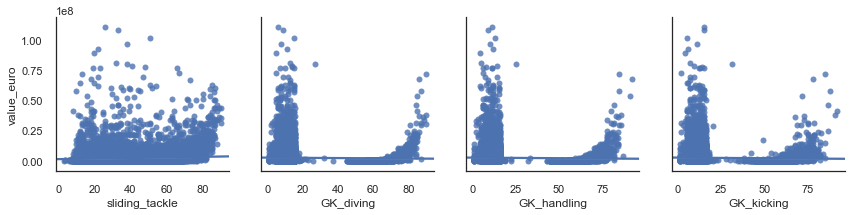

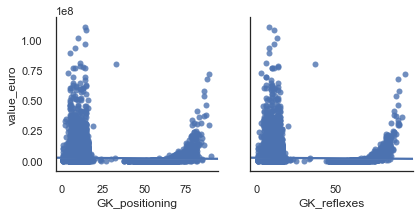

In [153]:
for i in row_groups:
    pp = sns.pairplot(data=fifa, y_vars=['value_euro'],x_vars=i, kind="reg", height=3)

In [154]:
fifa['age'].mean()

25.53353296796429

In [155]:
fifa['age'].std()

4.696969639924347

Hypothesis Testing

In [196]:
#use this 
#use trim dataframe for linear 

#ha: there is statistical difference between the value of right and left footed players 
#ho: there is no statistical difference between the value of right and left footed players 

foot_df = fifa[['preferred_foot','value_euro']]

left_df = foot_df[foot_df['preferred_foot']==1]
right_df = foot_df[foot_df['preferred_foot']==2]

statistic, pvalue = ttest_ind(left_df['value_euro'],right_df['value_euro'], equal_var= False,)
alpha = 0.025 

print("Pvalue:", float(pvalue)) 

print("Tstat:", float(statistic)) 

if pvalue < alpha:
    print("Null hypothesis rejected, there is a statistical significance between playered who prefer left and right foot")
else:
    print("Fail to reject null hypothesis there is no statistical significance between between playered who prefer left and right foot")

Pvalue: 0.02806382089903773
Tstat: 2.1968892475632797
Fail to reject null hypothesis there is no statistical significance between between playered who prefer left and right foot


In [310]:
fifa[fifa['preferred_foot']==1].describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,preferred_foot,release_clause_euro,club_rating,club_position,national_rating,national_team_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
count,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000
mean,25.508738,173.673733,74.362354,66.818932,71.899757,2656160.194175,10574.029126,1.000000,4538900.485437,69.719903,23.305340,3.763592,1.053641,56.648301,46.904612,53.563835,61.392961,44.490291,59.933981,52.534951,47.483738,55.702427,61.874029,67.910437,67.915777,66.299515,62.248058,66.330825,57.767961,64.514806,65.840049,64.256796,49.756311,57.612136,50.462864,53.323544,55.102427,50.206068,59.920146,50.953641,52.080583,50.364320,13.452670,13.343447,13.185922,13.279854,13.429126
std,4.563854,13.688113,6.901427,6.583671,6.093302,5990822.703542,23509.098109,0.000000,11576506.688979,5.142088,6.764335,16.612369,4.935396,16.188149,17.532722,14.390736,12.280852,16.251555,15.520664,17.476770,17.354458,13.526387,13.444622,13.019696,12.713549,13.396782,8.781208,13.320667,15.888038,11.785708,13.382904,12.502549,17.873835,15.330669,18.880609,16.491405,13.450337,13.928563,10.490087,17.873229,19.497793,19.511802,12.955793,12.471818,12.150545,12.625484,13.189353
min,17.000000,152.400000,49.900000,47.000000,53.000000,10000.000000,1000.000000,1.000000,0.000000,54.000000,1.000000,0.000000,0.000000,8.000000,5.000000,7.000000,11.000000,4.000000,6.000000,6.000000,3.000000,10.000000,8.000000,15.000000,15.000000,19.000000,32.000000,16.000000,9.000000,27.000000,12.000000,28.000000,5.000000,12.000000,6.000000,4.000000,10.000000,9.000000,13.000000,5.000000,7.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,154.940000,69.900000,63.000000,68.000000,400000.000000,2000.000000,1.000000,445500.000000,66.000000,22.000000,0.000000,0.000000,49.000000,33.000000,46.000000,57.000000,32.000000,55.000000,40.000000,34.000000,48.000000,58.000000,63.000000,63.000000,59.000000,57.000000,59.000000,48.000000,58.000000,60.000000,57.000000,36.000000,48.000000,35.000000,46.000000,46.000000,41.000000,53.000000,37.000000,35.000000,33.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,175.260000,73.900000,67.000000,72.000000,775000.000000,4000.000000,1.000000,1100000.000000,69.000000,27.000000,0.000000,0.000000,61.000000,49.000000,55.000000,64.000000,45.000000,63.000000,55.000000,46.000000,58.000000,64.000000,70.000000,70.000000,68.000000,63.000000,68.000000,61.000000,65.000000,68.000000,65.000000,53.000000,60.000000,56.000000,57.000000,56.000000,50.000000,60.000000,56.000000,60.000000,57.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,185.420000,78.900000,71.000000,76.000000,2400000.000000,10000.000000,1.000000,3300000.000000,73.000000,27.000000,0.000000,0.000000,67.000000,61.000000,63.000000,69.000000,57.000000,70.000000,66.000000,62.000000,65.000000,70.000000,76.000000,76.000000,76.000000,68.000000,75.000000,69.000000,72.000000,75.000000,73.000000,64.000000,69.000000,65.000000,65.000000,65.000000,61.000000,67.000000,65.000000,67.000000,66.000000,14.000000,14.000000,13.000000,13.000000,14.000000
max,40.000000,

In [309]:
fifa[fifa['preferred_foot']==2].describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,preferred_foot,release_clause_euro,club_rating,club_position,national_rating,national_team_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
count,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000
mean,25.541056,175.311627,75.571750,66.045659,71.313131,2425613.079019,9702.260844,2.000000,4109354.149790,69.237646,23.461963,3.676191,1.046616,47.618013,44.917520,51.727815,57.739009,42.250534,53.920539,45.503572,41.241108,51.751749,57.167980,63.735400,63.882097,62.527948,61.665292,63.130643,54.611091,65.131379,62.326165,65.450328,45.988659,55.295972,45.511378,48.852493,52.942485,47.782679,58.293468,46.003756,46.418808,44.296635,17.747036,17.485603,17.308712,17.473231,17.869136
std,4.736758,14.118489,7.117503,7.079352,6.140800,5590695.020055,21518.617727,0.000000,10624488.372186,5.073376,7.406893,16.363468,4.967856,18.598552,20.191489,18.316307,15.423642,18.197315,19.815304,18.518546,17.361727,15.806516,17.601784,15.424671,15.158344,15.090624,9.176137,14.348374,17.672874,11.692674,16.500272,12.524971,19.775240,17.911806,21.147597,20.438083,14.275920,16.266414,11.911558,20.474679,22.100220,21.573329,18.975160,18.123470,17.689399,18.224268,19.269745
min,17.000000,152.400000,49.900000,47.000000,50.000000,10000.000000,1000.000000,2.000000,0.000000,54.000000,1.000000,0.000000,0.000000,5.000000,2.000000,4.000000,7.000000,3.000000,4.000000,6.000000,4.000000,9.000000,5.000000,12.000000,12.000000,11.000000,24.000000,16.000000,2.000000,15.000000,12.000000,20.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,162.560000,69.900000,62.000000,67.000000,300000.000000,1000.000000,2.000000,365500.000000,65.000000,23.000000,0.000000,0.000000,35.000000,28.000000,44.000000,52.000000,29.000000,46.000000,32.000000,29.000000,41.000000,52.000000,55.000000,55.000000,54.000000,55.000000,55.000000,44.000000,58.000000,55.000000,58.000000,30.000000,42.000000,24.000000,35.000000,43.000000,38.000000,51.000000,28.000000,24.000000,22.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,182.880000,74.800000,66.000000,71.000000,675000.000000,3000.000000,2.000000,961000.000000,69.000000,27.000000,0.000000,0.000000,52.000000,48.000000,56.000000,62.000000,43.000000,60.000000,47.000000,40.000000,55.000000,62.000000,67.000000,67.000000,65.000000,62.000000,65.000000,58.000000,66.000000,66.000000,67.000000,50.000000,58.000000,50.000000,55.000000,55.000000,49.000000,59.000000,51.000000,53.000000,49.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2000000.000000,9000.000000,2.000000,2800000.000000,72.000000,27.000000,0.000000,0.000000,62.000000,62.000000,65.000000,68.000000,56.000000,67.000000,60.000000,54.000000,64.000000,69.000000,75.000000,74.000000,73.000000,68.000000,73.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,63.000000,66.000000,63.000000,14.000000,14.000000,14

In [194]:
Left_Foot_Value_mean = float(2.656160e+06)
Left_Foot_Value_mean

2656160.0

In [195]:
Right_Foot_Value_mean = float(2.425613e+06)
Right_Foot_Value_mean

2425613.0

In [166]:
fifa['value_euro'].mean()

2479280.1853212044

In [ ]:
ask hannah 

if we remove our outliers 2.5% 
if player not in upper lower 2.5% of players then they might be stat sign in preferrred foot 


national team players  null 17097 
on a national team theres about 600 
should we do a paired t test to compare even though the samples are far off 




In [206]:
from statsmodels.stats.power import TTestIndPower

In [208]:
# before we even start the experiment, we want to know in order to attain a power of .8 given an alpha of .05,
# how many observations we need
effect_size = 0.8
alpha = 0.025 # significance level
power = 0.8
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size,
                                         power = power,
                                         alpha = alpha)
sample_size

30.994809182633027

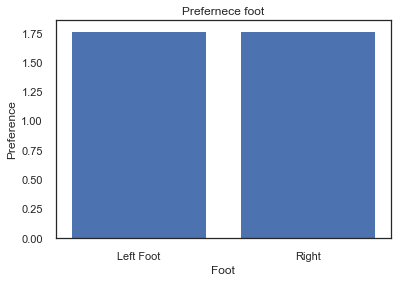

In [164]:

fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(['Left Foot','Right'],fifa['preferred_foot'].mean())

# Set the x-axis tick labels to the country names
#
ax.set_xlabel('Foot')
# Set the y-axis label
ax.set_ylabel('Preference')

ax.set_title('Prefernece foot')

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


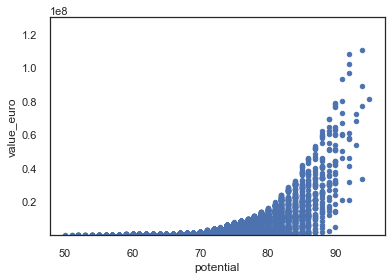

In [232]:
var = 'potential'
data = pd.concat([fifa['value_euro'], fifa[var]], axis=1)
data.plot.scatter(x=var, y='value_euro', ylim=(3,130000000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


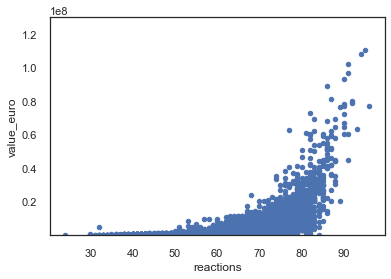

In [230]:
var = 'reactions'
data = pd.concat([fifa['value_euro'], fifa[var]], axis=1)
data.plot.scatter(x=var, y='value_euro', ylim=(3,130000000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


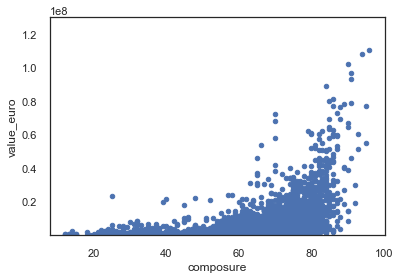

In [225]:
var = 'composure'
data = pd.concat([fifa['value_euro'], fifa[var]], axis=1)
data.plot.scatter(x=var, y='value_euro', ylim=(3,130000000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


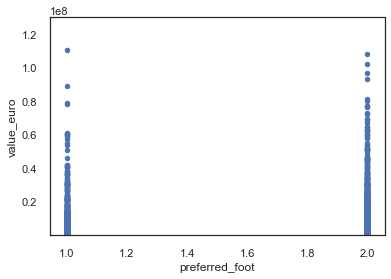

In [224]:
var = 'preferred_foot'
data = pd.concat([fifa['value_euro'], fifa[var]], axis=1)
data.plot.scatter(x=var, y='value_euro', ylim=(3,130000000));

In [240]:
df_new = fifa[['value_euro','potential']]
df_new

,value_euro,potential
id,,
158023,110500000.0,94
190460,69500000.0,89
195864,73000000.0,91
198219,62000000.0,88
201024,60000000.0,91
...,...,...
204322,975000.0,70
239762,190000.0,67
235155,170000.0,67


In [244]:
df_new.drop(df_new[df_new['potential'] < 88].index, inplace = True)

In [246]:
df_new.mean()

value_euro    4.203182e+07
potential     8.952273e+01
dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


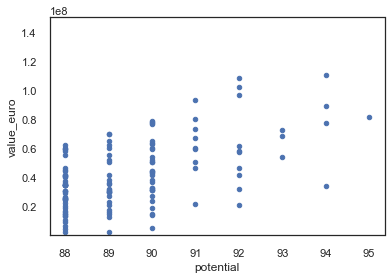

In [248]:
var = 'potential'
data = pd.concat([df_new['value_euro'], df_new[var]], axis=1)
data.plot.scatter(x=var, y='value_euro', ylim=(3,150000000));

In [250]:
fifa_trim = fifa.copy()
fifa_trim

,name,age,height_cm,weight_kgs,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,release_clause_euro,club_team,club_rating,club_position,national_team,national_rating,national_team_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,170.18,72.1,Argentina,94,94,110500000.0,565000.0,1,226500000.0,FC Barcelona,86.0,8,Argentina,82.0,7,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8
190460,C. Eriksen,27,154.94,76.2,Denmark,88,89,69500000.0,205000.0,2,133800000.0,Tottenham Hotspur,83.0,13,Denmark,78.0,10,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6
195864,P. Pogba,25,190.50,83.9,France,88,91,73000000.0,255000.0,2,144200000.0,Manchester United,82.0,13,France,84.0,20,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3
198219,L. Insigne,27,162.56,59.0,Italy,88,88,62000000.0,165000.0,2,105400000.0,Napoli,82.0,1,Italy,83.0,4,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,8,4,14,9,10
201024,K. Koulibaly,27,187.96,88.9,Senegal,88,91,60000000.0,135000.0,2,106500000.0,Napoli,82.0,23,0,0.0,0,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,7,11,7,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204322,R. McKenzie,25,175.26,74.8,Scotland,67,70,975000.0,3000.0,2,1800000.0,Kilmarnock,67.0,27,0,0.0,0,57,61,60,66,37,64,53,47,61,66,83,86,93,63,82,51,77,75,64,54,69,41,60,64,63,56,40,20,18,15,11,15,12,7
239762,M. Sipľak,23,182.88,79.8,Slovakia,59,67,190000.0,1000.0,1,295000.0,Cracovia,65.0,22,0,0.0,0,50,19,53,55,31,52,26,28,43,53,70,64,54,50,53,27,74,66,70,22,62,55,42,39,32,52,53,64,60,15,7,7,15,8
235155,J. Bekkema,22,185.42,89.8,Netherlands,59,67,170000.0,1000.0,2,289000.0,SC Heerenveen,69.0,29,0,0.0,0,11,9,13,26,9,12,13,12,24,18,27,22,29,48,38,17,43,25,63,9,27,10,5,25,16,47,9,12,13,63,57,50,58,63


In [399]:
fifa_trim[fifa_trim['club_team'] == 'Ecuador']

,name,age,height_cm,weight_kgs,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,release_clause_euro,club_team,club_rating,club_position,national_team,national_rating,national_team_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
207653,M. Bolaños,28,170.180000,64.000000,Ecuador,73,73,4000000.000000,18000.000000,2,6900000.000000,Ecuador,72.000000,27,Club Tijuana,71.000000,10,58,72,43,65,64,78,63,56,61,73,87,78,75,69,83,73,57,74,58,68,57,23,73,73,61,56,21,25,24,15,15,9,6,9
241412,A. Preciado,24,182.880000,71.200000,Ecuador,71,75,3100000.000000,13000.000000,1,5500000.000000,Ecuador,72.000000,27,Santos Laguna,72.000000,27,70,69,71,67,73,73,64,68,69,68,87,82,79,66,65,82,58,71,70,70,43,37,64,61,71,61,31,19,20,7,6,11,8,6
199103,A. Domínguez,31,195.580000,83.900000,Ecuador,71,71,1400000.000000,7000.000000,2,2200000.000000,Ecuador,72.000000,28,Vélez Sarsfield,71.000000,27,13,18,11,28,17,19,19,11,22,22,29,35,36,73,40,25,50,30,69,13,21,16,15,59,18,63,18,20,19,70,66,69,71,71
204406,G. Achilier,33,152.400000,84.800000,Ecuador,71,71,950000.000000,7000.000000,2,1600000.000000,Ecuador,72.000000,25,Monarcas Morelia,69.000000,23,49,18,71,51,21,43,36,30,37,53,54,42,36,65,47,16,76,70,82,17,68,74,28,32,35,54,70,74,70,15,8,13,15,9
204738,R. Ibarra,28,175.260000,68.900000,Ecuador,75,75,7000000.000000,52000.000000,2,11900000.000000,Ecuador,72.000000,27,Club América,74.000000,16,76,60,47,70,64,77,60,61,62,75,91,93,84,67,75,70,69,79,70,68,73,56,64,68,54,63,57,52,46,6,9,14,13,8
220295,E. Valencia,29,152.400000,76.200000,Ecuador,76,76,8000000.000000,55000.000000,2,12800000.000000,Ecuador,72.000000,2,Tigres U.A.N.L.,75.000000,10,70,75,71,68,65,74,71,65,63,74,88,87,80,72,77,80,90,80,74,74,57,42,74,67,70,73,25,40,42,9,12,16,9,8


trimmed data

In [254]:
upper_q = fifa_trim['value_euro'].quantile(.975)
fifa_trim = fifa_trim[fifa_trim['value_euro'] < upper_q]
lower_q = fifa_trim['value_euro'].quantile(.025)
fifa_trim = fifa_trim[fifa_trim['value_euro'] > lower_q]

In [366]:
fifa_trim.shape

(16714, 51)

In [256]:
#ha: there is statistical difference between the value of right and left footed players 
#ho: there is no statistical difference between the value of right and left footed players 

foot_df = fifa_trim[['preferred_foot','value_euro']]

left_df = foot_df[foot_df['preferred_foot']==1]
right_df = foot_df[foot_df['preferred_foot']==2]

statistic, pvalue = ttest_ind(left_df['value_euro'],right_df['value_euro'], equal_var= False,)
alpha = 0.025 

print("Pvalue:", float(pvalue)) 

print("Tstat:", float(statistic)) 

if pvalue < alpha:
    print("Null hypothesis rejected, there is a statistical significance between playered who prefer left and right foot")
else:
    print("Fail to reject null hypothesis there is no statistical significance between between playered who prefer left and right foot")

Pvalue: 0.07171615939886139
Tstat: 1.8012098199198197
Fail to reject null hypothesis there is no statistical significance between between playered who prefer left and right foot


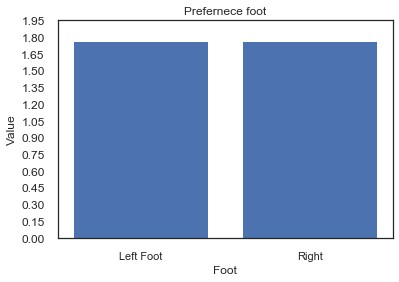

In [411]:

fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(['Left Foot','Right'],fifa_trim['preferred_foot'].mean())

# Set the x-axis tick labels to the country names
#
ax.set_xlabel('Foot')
# Set the y-axis label
ax.set_ylabel('Value')
plt.yticks(np.arange(0, 2, step=.15),fontsize=12)
ax.set_title('Prefernece foot')

plt.show()

In [259]:
pd.set_option('float_format', '{:f}'.format)
fifa_trim[fifa_trim['preferred_foot']==1].mean()

age                           25.495798
height_cm                    173.654632
weight_kgs                    74.330074
overall_rating                66.596639
potential                     71.673287
value_euro               1893763.687293
wage_euro                   8138.018844
preferred_foot                 1.000000
release_clause_euro      3089216.959511
club_rating                   69.507767
club_position                 23.393685
national_rating                2.868347
national_team_position         0.858416
crossing                      56.599694
finishing                     46.753501
heading_accuracy              53.687802
short_passing                 61.310415
volleys                       44.236313
dribbling                     59.878279
curve                         52.353960
freekick_accuracy             47.248281
long_passing                  55.593838
ball_control                  61.821492
acceleration                  67.935829
sprint_speed                  67.973771


In [260]:
pd.set_option('float_format', '{:f}'.format)
fifa[fifa['preferred_foot']==1].mean()

age                           25.508738
height_cm                    173.673733
weight_kgs                    74.362354
overall_rating                66.818932
potential                     71.899757
value_euro               2656160.194175
wage_euro                  10574.029126
preferred_foot                 1.000000
release_clause_euro      4538900.485437
club_rating                   69.719903
club_position                 23.305340
national_rating                3.763592
national_team_position         1.053641
crossing                      56.648301
finishing                     46.904612
heading_accuracy              53.563835
short_passing                 61.392961
volleys                       44.490291
dribbling                     59.933981
curve                         52.534951
freekick_accuracy             47.483738
long_passing                  55.702427
ball_control                  61.874029
acceleration                  67.910437
sprint_speed                  67.915777


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


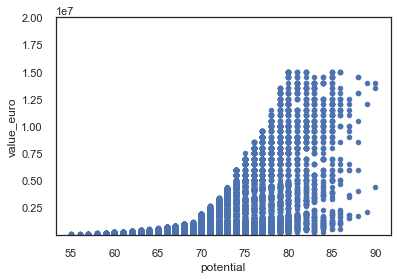

In [268]:
var = 'potential'
data = pd.concat([fifa_trim['value_euro'], fifa_trim[var]], axis=1)
data.plot.scatter(x=var, y='value_euro', ylim=(3,20000000));

In [361]:
most_clubs = fifa_trim['club_team'].value_counts()
most_clubs.tail(30)

FC Barcelona           14
Napoli                 13
Chile                  13
Real Madrid            13
Paris Saint-Germain    13
Limerick FC            12
Bray Wanderers         10
Mexico                 10
Australia               9
Colombia                9
Juventus                7
Switzerland             7
Peru                    7
Argentina               6
Austria                 6
Ecuador                 6
New Zealand             6
Venezuela               5
Uruguay                 4
Egypt                   2
Bolivia                 2
Portugal                2
Paraguay                2
Cameroon                2
Canada                  1
Finland                 1
Greece                  1
Slovenia                1
Romania                 1
Côte d'Ivoire           1
Name: club_team, dtype: int64

In [392]:
most_clubs.Portugal

2

In [351]:
most_clubs.shape

(674,)

In [400]:
most_national = fifa_trim['national_team'].value_counts()
most_national

0                           16071
United States                  23
Scotland                       22
Northern Ireland               22
Norway                         22
Republic of Ireland            21
Czech Republic                 21
Greece                         19
Canada                         19
Turkey                         19
Wales                          19
Cameroon                       18
Denmark                        18
Finland                        18
Sweden                         18
Brazil                         17
Poland                         16
Australia                      13
Iceland                        12
Austria                        12
Venezuela                      12
Slovenia                       11
Russia                         11
Côte d'Ivoire                  11
Netherlands                    11
Romania                        11
Switzerland                    11
England                         8
Mexico                          8
Chile         

In [371]:
most_national.Portugal

6

In [328]:
pd.set_option('display.max_rows', None)
most_clubs.sort_values(ascending=False)

Burnley                                33
Hannover 96                            33
Fortuna Düsseldorf                     33
Huddersfield Town                      33
Rayo Vallecano                         33
Southampton                            33
Cardiff City                           32
Hertha BSC                             32
Brighton & Hove Albion                 32
Real Valladolid CF                     32
FC Augsburg                            32
FC Nantes                              32
CD Leganés                             32
Bournemouth                            31
Fulham                                 31
Newcastle United                       31
RC Celta                               31
RCD Espanyol                           31
1. FSV Mainz 05                        31
FC Girondins de Bordeaux               31
Brentford                              30
Blackburn Rovers                       30
Stoke City                             30
RC Strasbourg Alsace              

In [324]:
#break the colums in to groups to plot 4 on a row at a time
n = 4
row_groups= [all_features[i:i+n] for i in range(0, len(all_features), n)]

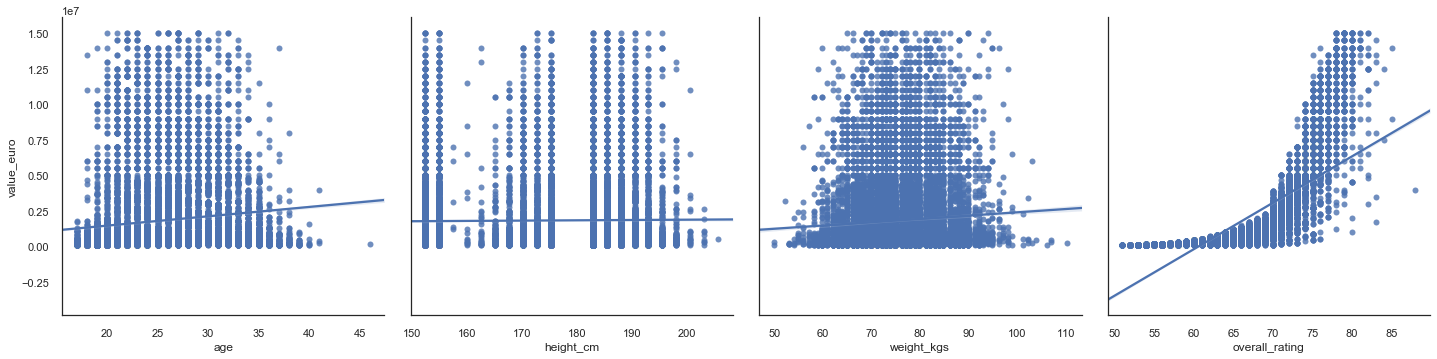

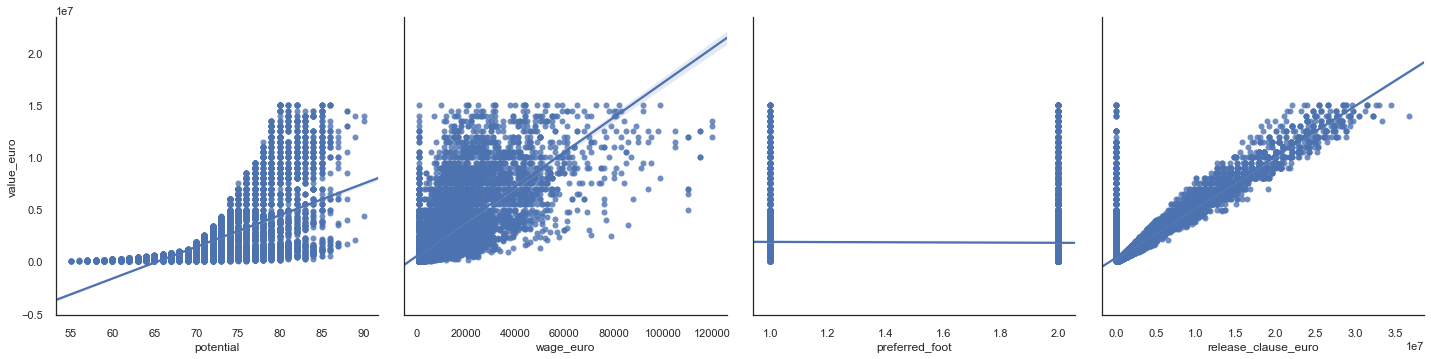

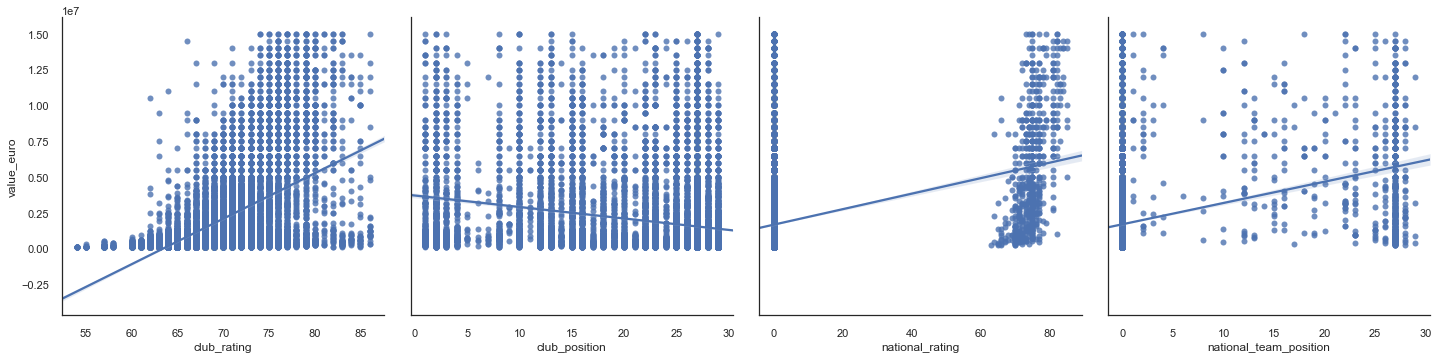

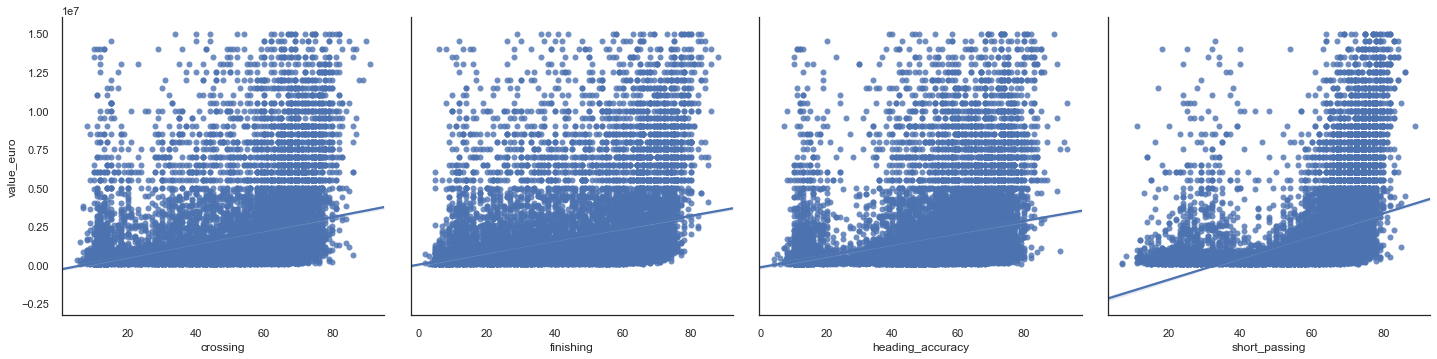

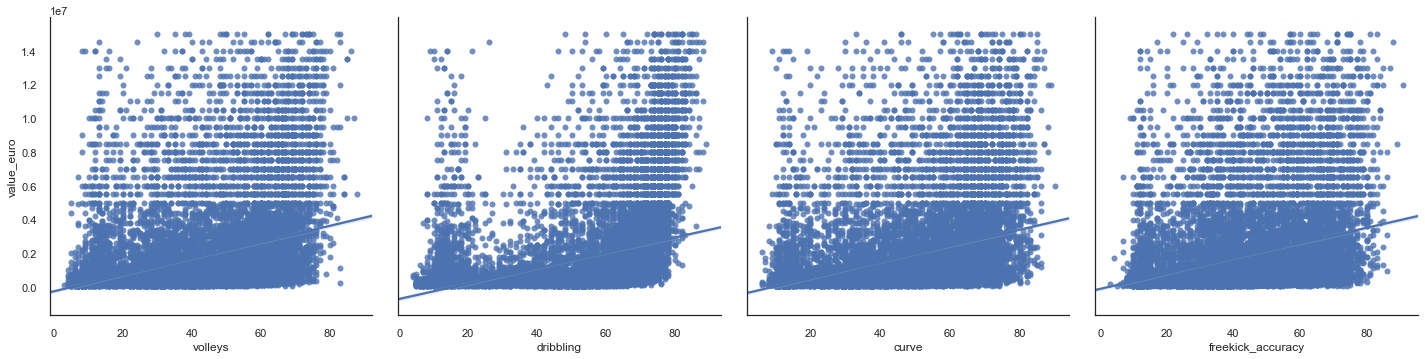

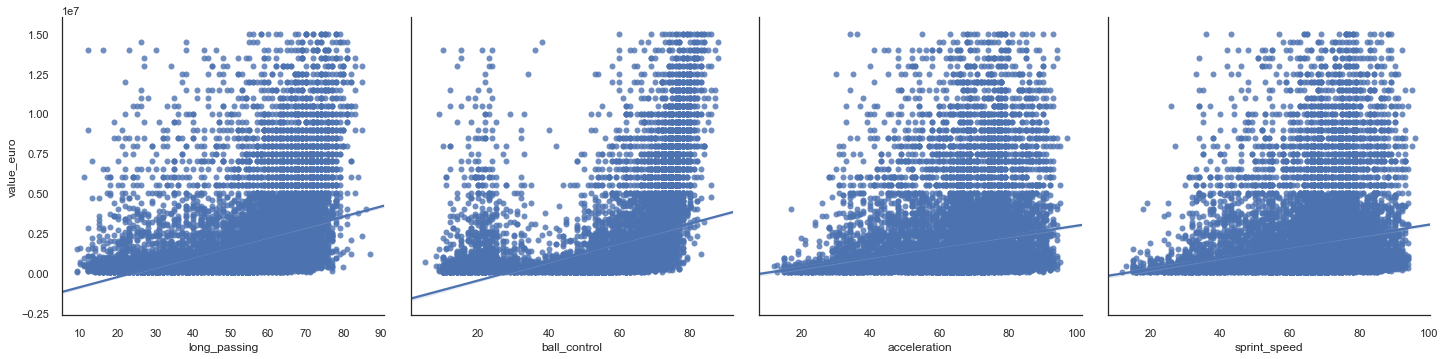

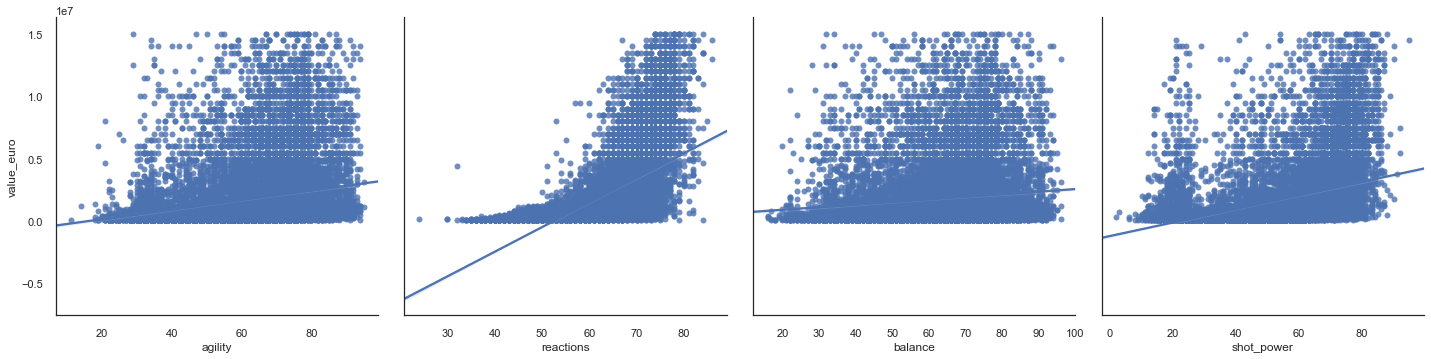

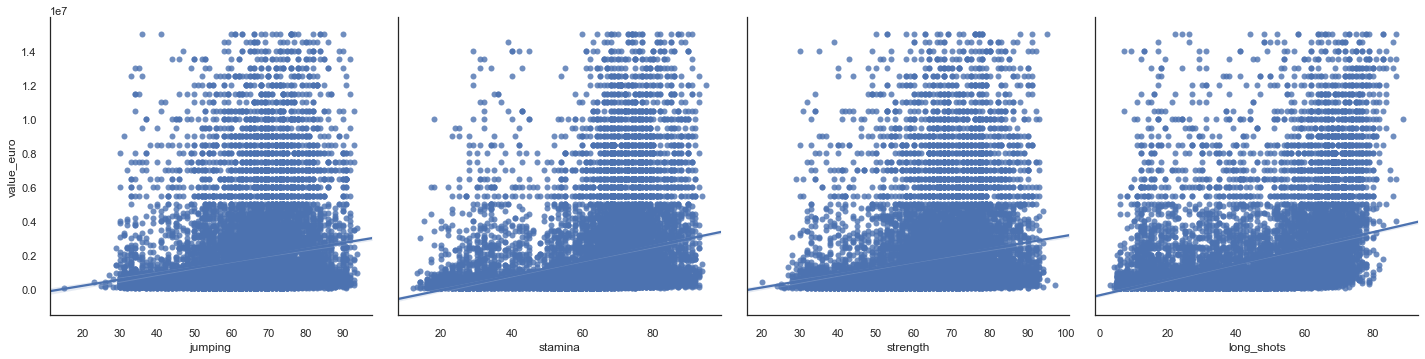

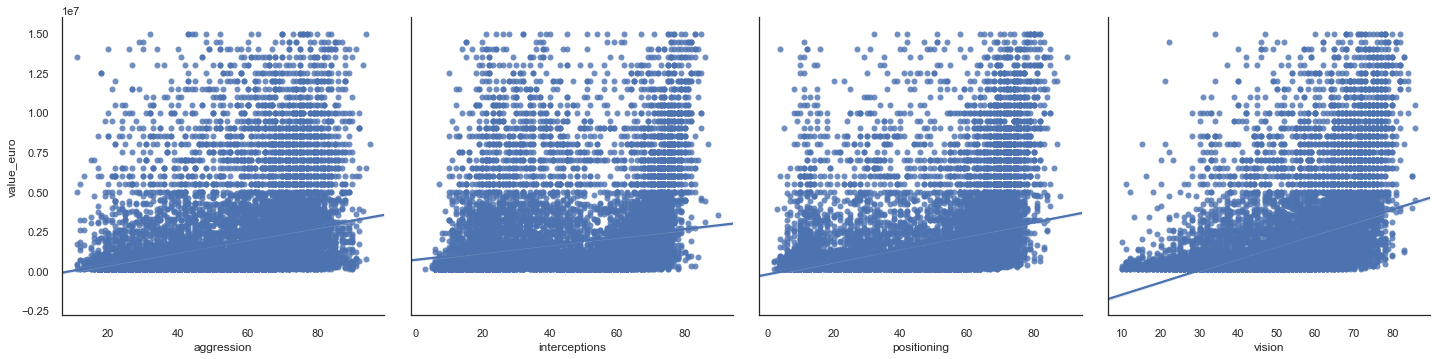

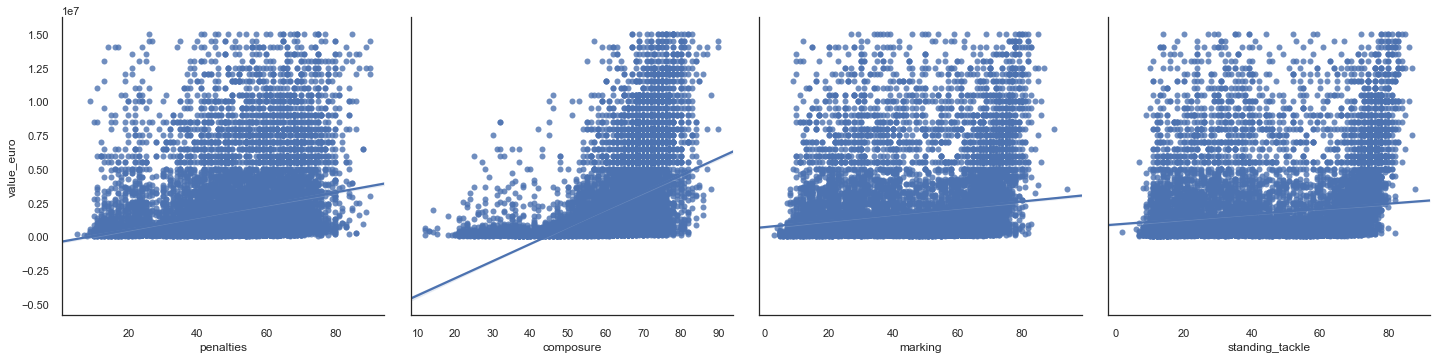

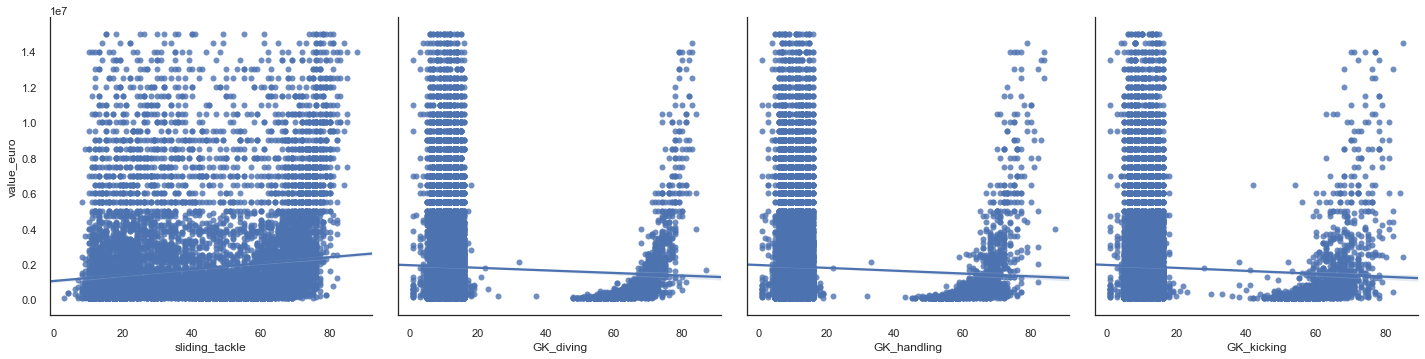

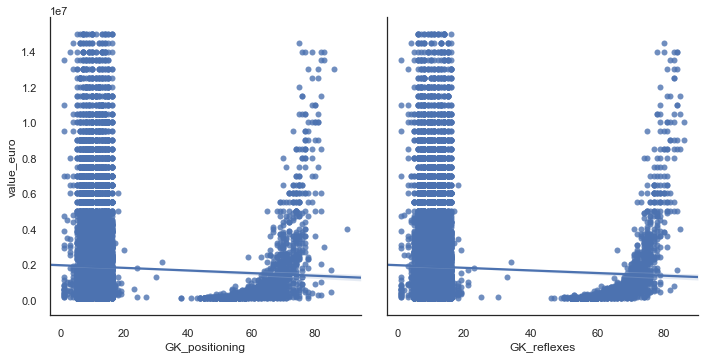

In [401]:
for i in row_groups:
    pp = sns.pairplot(data=fifa_trim, y_vars=['value_euro'],x_vars=i, kind="reg", height=5)

In [364]:
club_team_value = fifa_trim[['club_team','value_euro']]
club_team_value.shape

(16714, 2)

In [381]:
club_= club_team_value.groupby(['club_team'])


In [387]:
df_club = club_['value_euro'].mean().to_frame(name = 'mean').reset_index()
df_club

,club_team,mean
0,1. FC Heidenheim 1846,1010370.370370
1,1. FC Kaiserslautern,573461.538462
2,1. FC Köln,4702413.793103
3,1. FC Magdeburg,849423.076923
4,1. FC Nürnberg,2726333.333333
5,1. FC Union Berlin,2202407.407407
6,1. FSV Mainz 05,4616774.193548
7,AC Ajaccio,675000.000000
8,AC Horsens,396666.666667
9,AD Alcorcón,1017962.962963


In [391]:
df_club.sort_values(by= 'mean', ascending=False)

,club_team,mean
468,Portugal,12000000.000000
287,Greece,10500000.000000
49,Argentina,10083333.333333
500,Romania,9000000.000000
499,Roma,8787500.000000
624,Uruguay,8750000.000000
411,Napoli,8655769.230769
327,Inter,8391785.714286
522,SL Benfica,8307894.736842
395,Milan,7785714.285714


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2bedde50>,
      dtype=object)

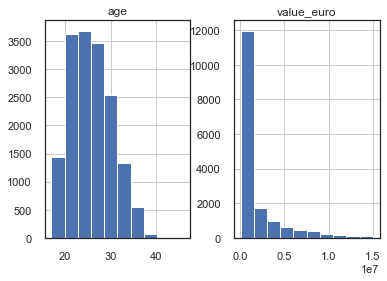

In [418]:
fifa_age = fifa_trim[['age','value_euro']]
fifa_age.hist()
